In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv(r"C:\Users\PC\Downloads\Student_Performance_Data\Student_Performance.csv")

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [47]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

### Data Visualization

In [37]:
#Make a histplot about the Extracurricular activites between all the columns and its counts...

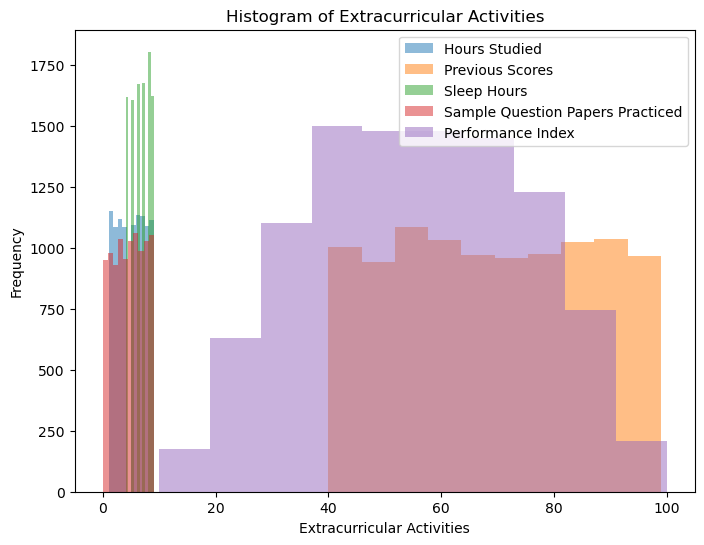

In [49]:
column = "Extracurricular Activities"

for column_name in df.columns:
    if column_name != column:
        plt.hist(df[column_name], alpha=0.5, label=column_name)


plt.xlabel(column)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column)
plt.legend(loc='best')
plt.show()

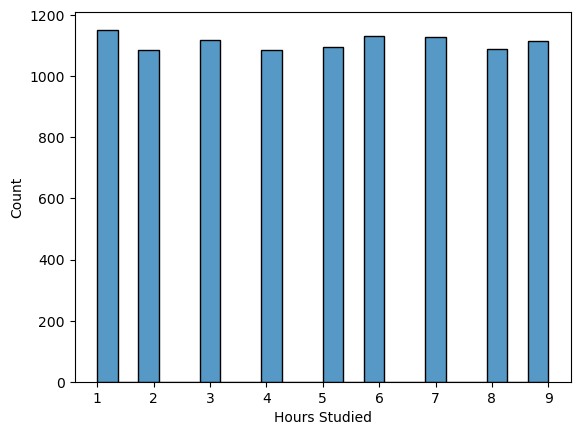

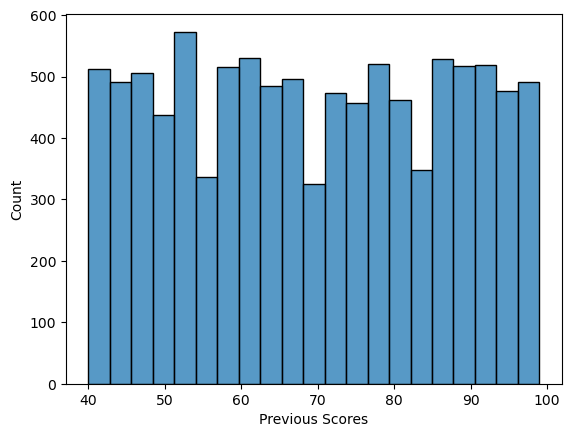

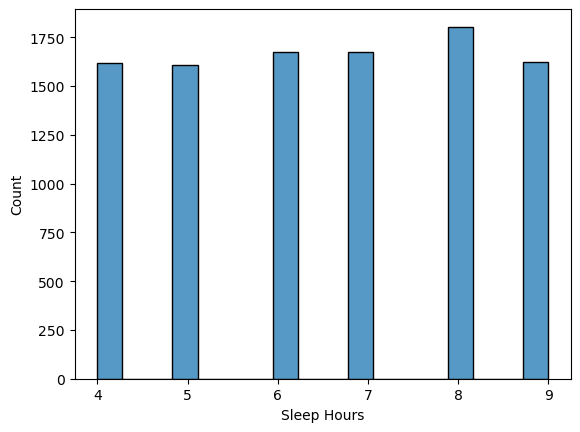

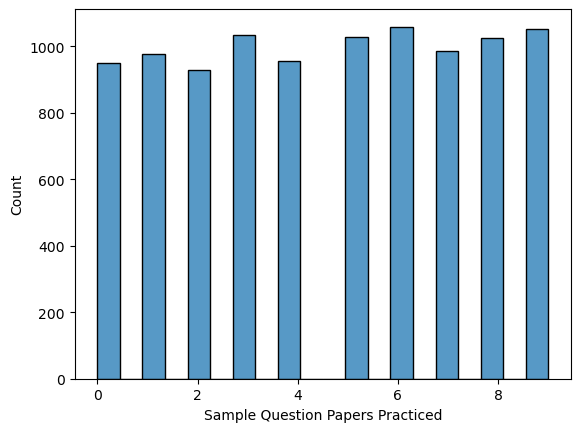

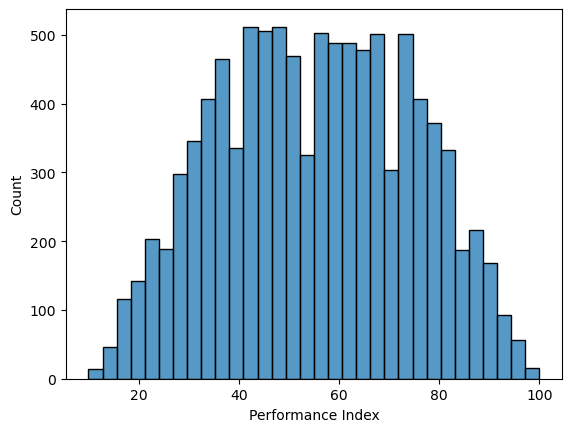

In [20]:
column = "Extracurricular Activities"
for no , column_name in enumerate(df.columns):
    if column_name != column:
        sns.histplot(data=df,x=column_name)
        plt.show()

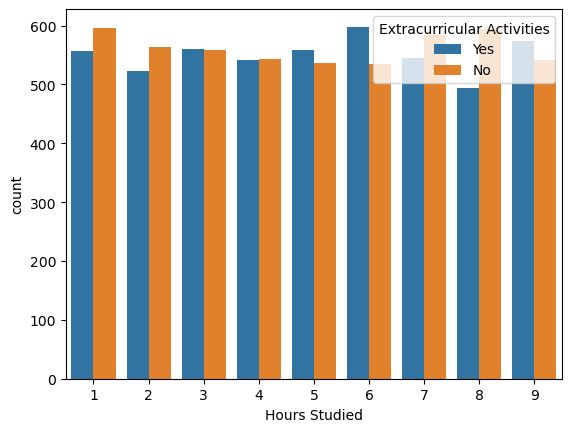

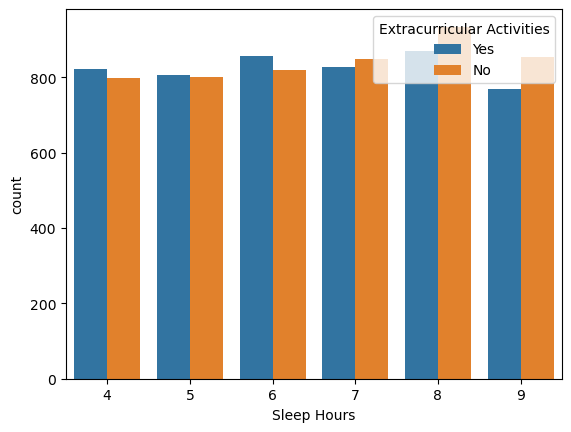

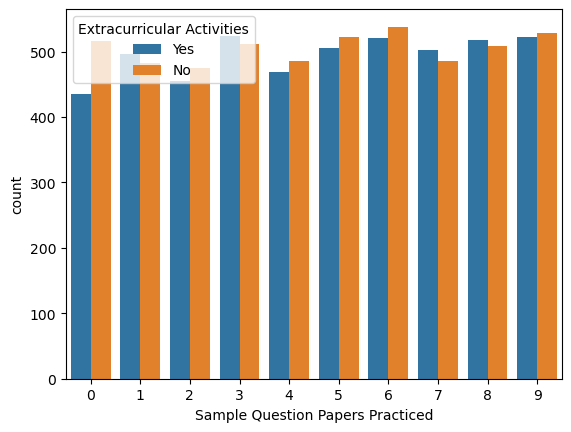

In [158]:
#Make a plot with two categories yes or no between all the columns and its counts ...
#help(sns.countplot)
columns=['Hours Studied', 'Sleep Hours','Sample Question Papers Practiced']
for no , column_name in enumerate(columns):
    if column_name != column:
        sns.countplot(data=df,x=column_name,hue=df["Extracurricular Activities"])
        plt.show()

In [30]:
df["Extracurricular Activities"].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

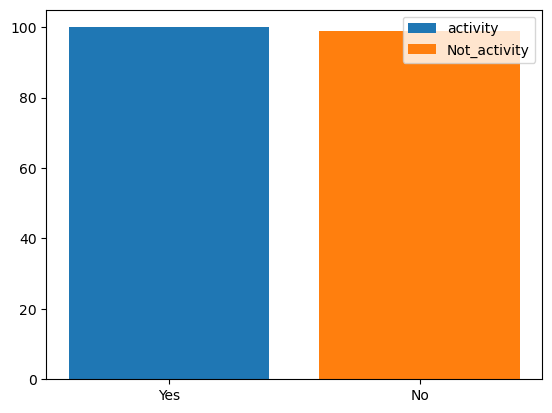

In [31]:
#Make a barplot to see if a student have any extracurricular activites will increase the performance and vice versa..
# Group the students with activities
activity = df['Extracurricular Activities'][df['Extracurricular Activities'] == "Yes"]
Not_activity=df['Extracurricular Activities'][df['Extracurricular Activities'] == "No"]
performance=df["Performance Index"][df['Extracurricular Activities']== "Yes"]
performance_2=df["Performance Index"][df['Extracurricular Activities']== "No"]
plt.bar(activity,performance,label="activity")
plt.bar(Not_activity,performance_2,label="Not_activity")
plt.legend()
plt.show()

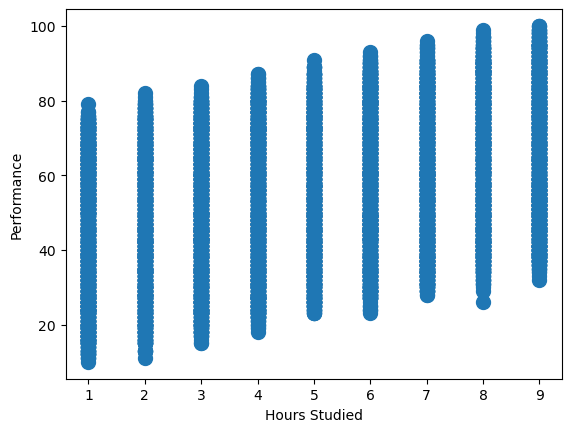

In [9]:
#Make a plot called scatter between the hours studied and the performance index..
plt.scatter(df["Hours Studied"],df["Performance Index"],s=100)
plt.xlabel("Hours Studied")
plt.ylabel("Performance")
plt.show()

In [37]:
#Make a plot to see the average performance by hours studied...

In [36]:
avg_performance_by_hours = df.groupby("Hours Studied")["Performance Index"].mean()
avg_performance_by_hours

Hours Studied
1    44.116319
2    46.428571
3    49.776586
4    52.719816
5    55.516453
6    58.486320
7    60.233835
8    64.211397
9    65.725561
Name: Performance Index, dtype: float64

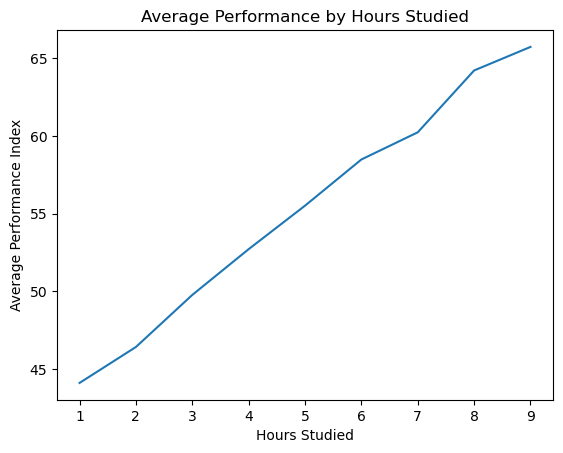

In [38]:
plt.plot(avg_performance_by_hours.index,avg_performance_by_hours.values)
plt.xlabel("Hours Studied")
plt.ylabel("Average Performance Index")
plt.title("Average Performance by Hours Studied")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_15112\1264466208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


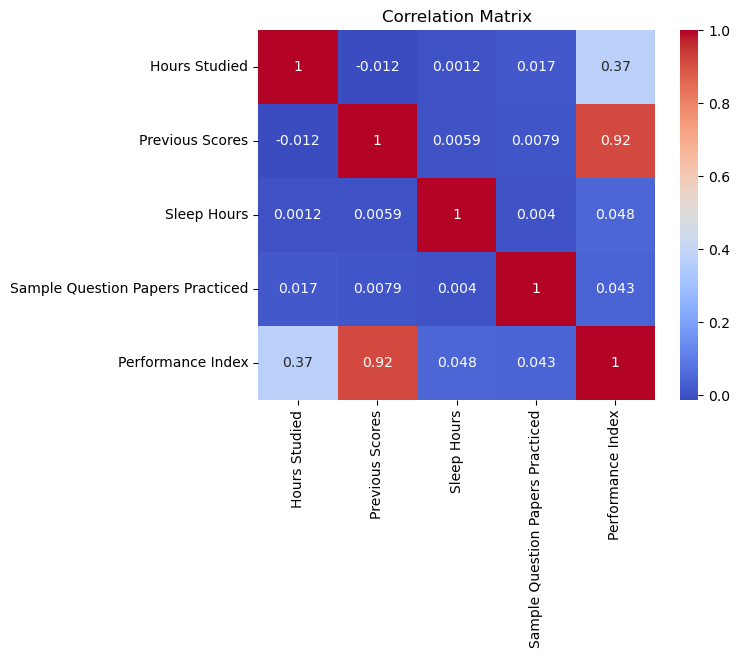

In [57]:
#Make a heatmap between all the columns to see the correlation?
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [46]:
#make a violinplot between the performance level and sample question papers practiced..
df["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

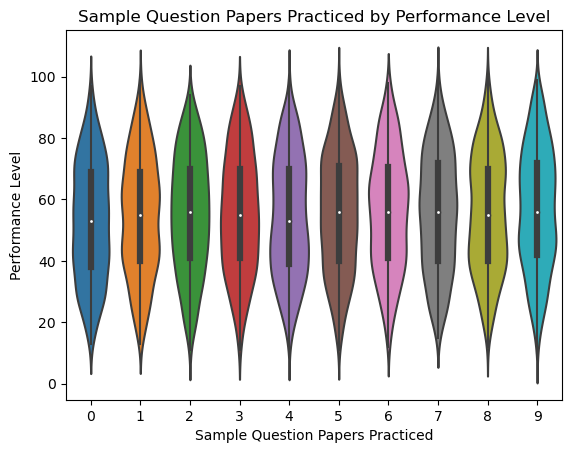

In [159]:
#The width of the violin represents the density at a particular value, with wider areas indicating higher density.
#The plot also includes a horizontal line or a dot to represent the median, and optionally,
#vertical lines or whiskers to represent the minimum and maximum values or certain percentiles.
sns.violinplot(x="Sample Question Papers Practiced",y="Performance Index",data=df)
plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("Performance Level")
plt.title('Sample Question Papers Practiced by Performance Level')
plt.show()

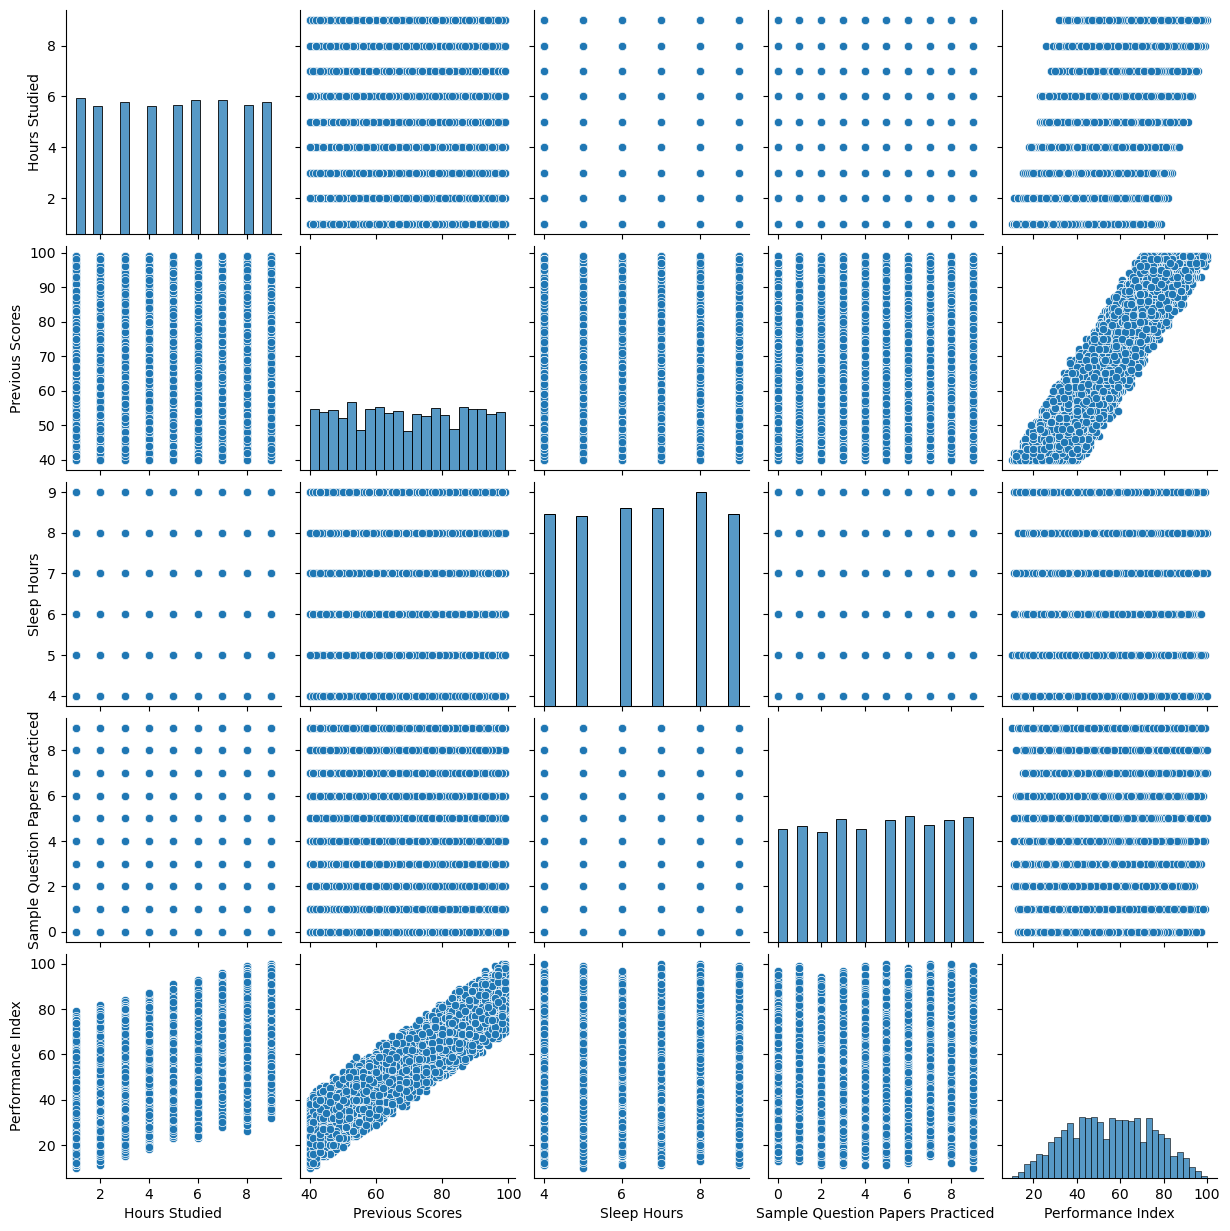

In [29]:
#Make a pairplot to all the columns of the data?
sns.pairplot(df)

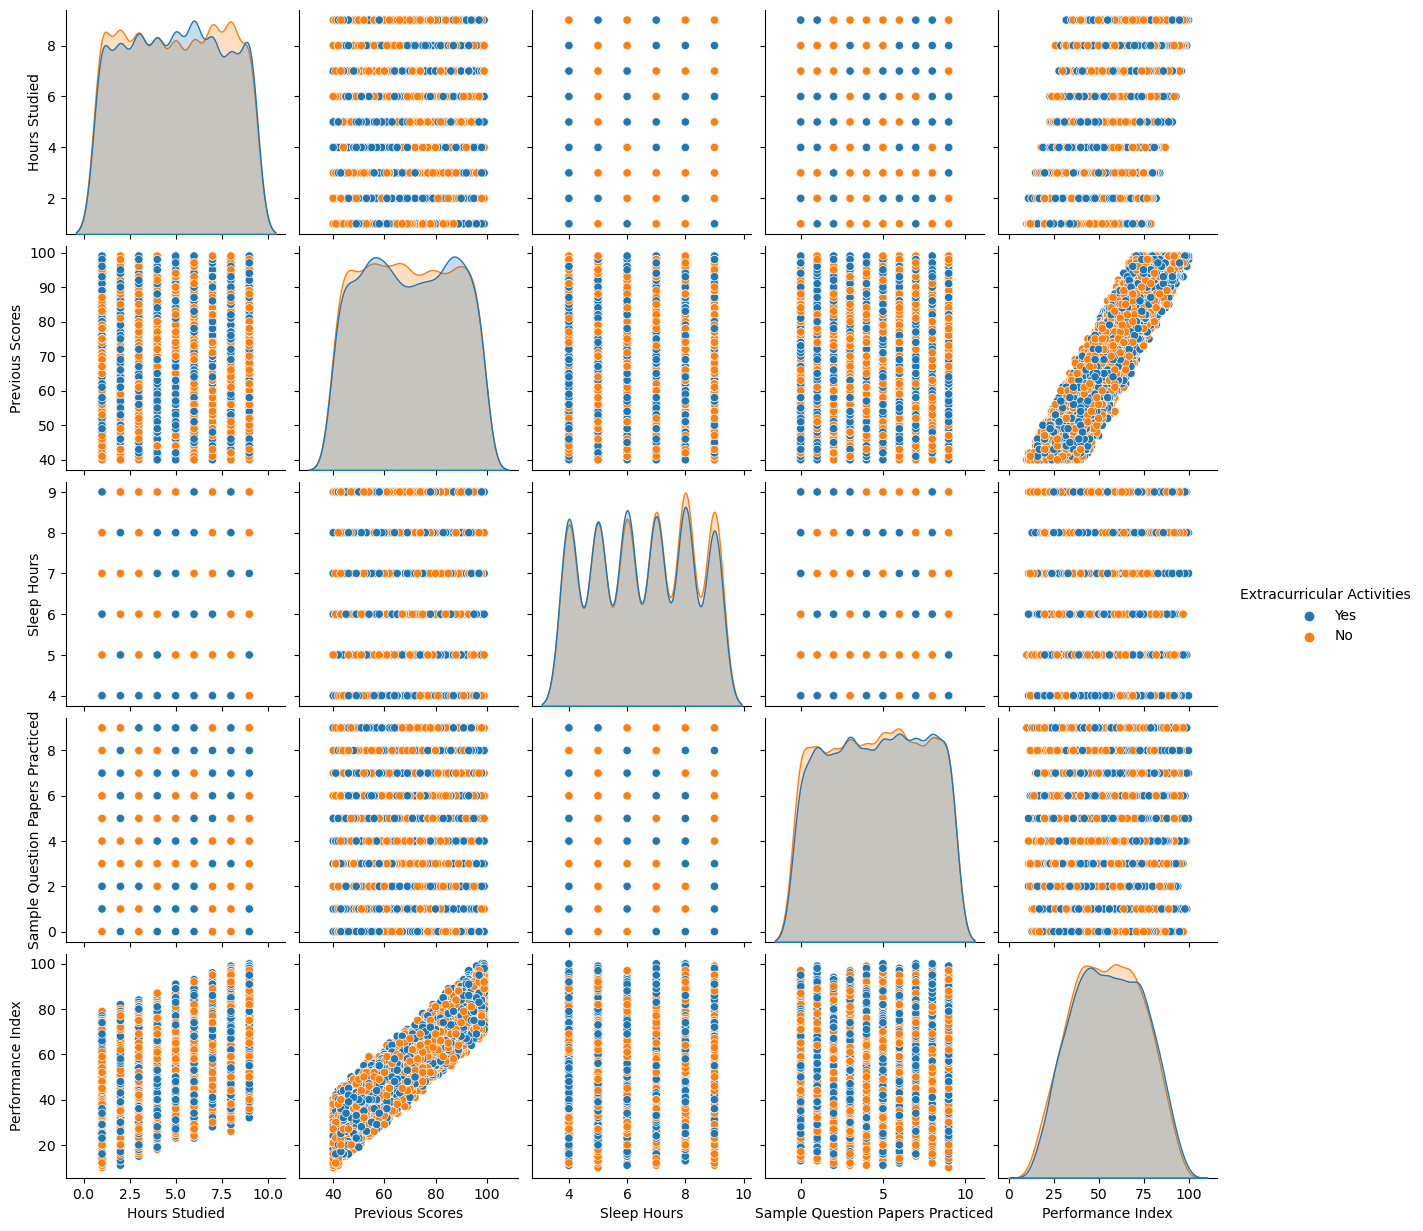

In [32]:
#Make a pairplot to all the columns of the data but based on extracurricular activities?
sns.pairplot(df, hue='Extracurricular Activities')

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

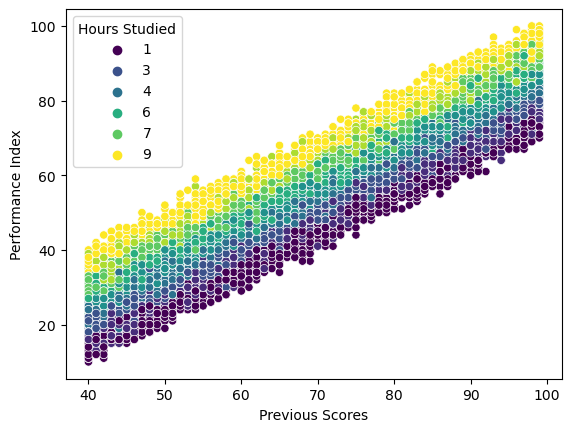

In [53]:
#Make a scatterplot between previous score and the performance index?
sns.scatterplot(x='Previous Scores',y='Performance Index',data=df,hue='Hours Studied',palette = 'viridis')

In [48]:
# Hue in plot functions refers to a parameter that allows for grouping and coloring the data points or elements 
#in a plot based on a categorical variable.

#When using the "hue" parameter in a plot function, each unique value of the categorical variable will be assigned a different
#color or shade, making it easier to differentiate between different groups or categories in the data.
#This can be useful for visualizing and analyzing patterns or relationships within different subsets of the data.

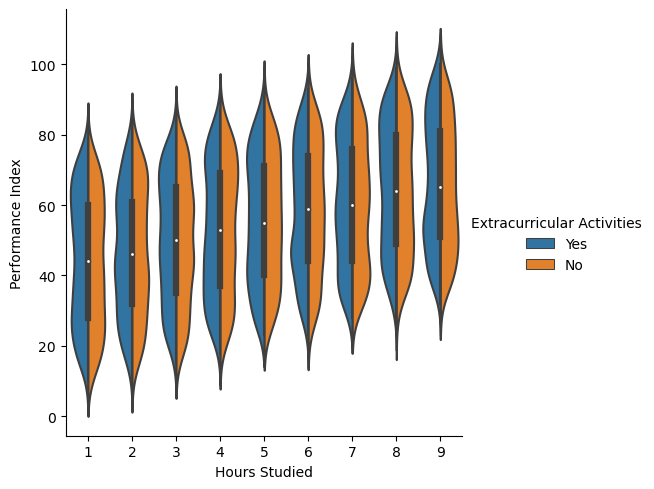

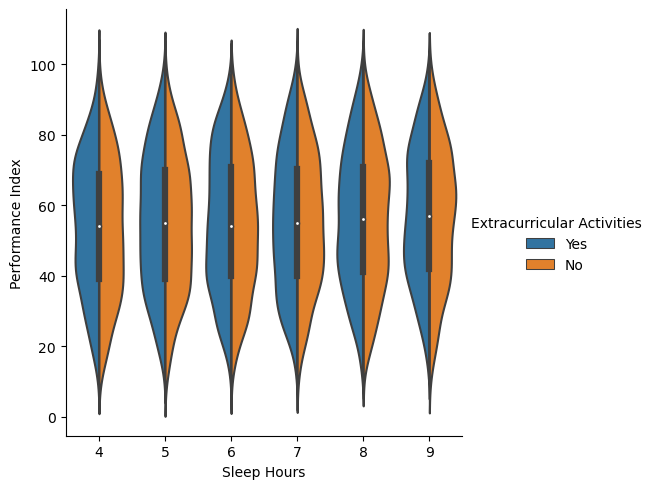

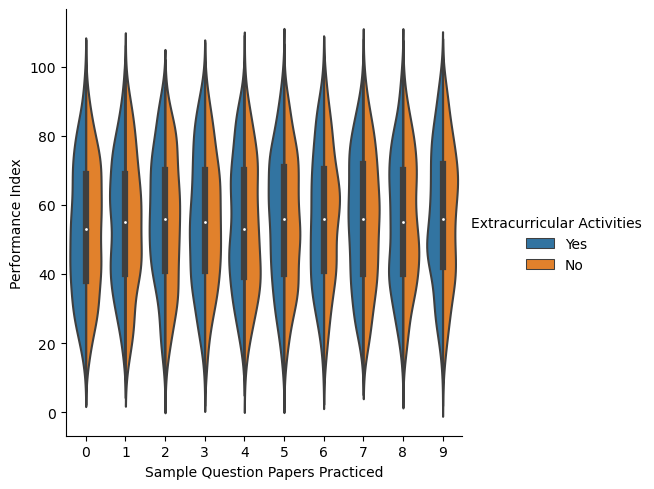

In [79]:
#Make a catplot between all the columns with the performance index that based on extracurricular activities..
for i in ['Hours Studied', 'Sleep Hours','Sample Question Papers Practiced']:
    sns.catplot(data=df, x=i, y='Performance Index',
                hue='Extracurricular Activities',kind="violin", split=True)

In [81]:
#Make a lineplot btween the average performance index and hours studied based on extracurricular activities?
a = 'Extracurricular Activities'
b = 'Performance Index'
df_Y = df[df['Extracurricular Activities'] == 'Yes']
df_N = df[df['Extracurricular Activities'] == 'No']

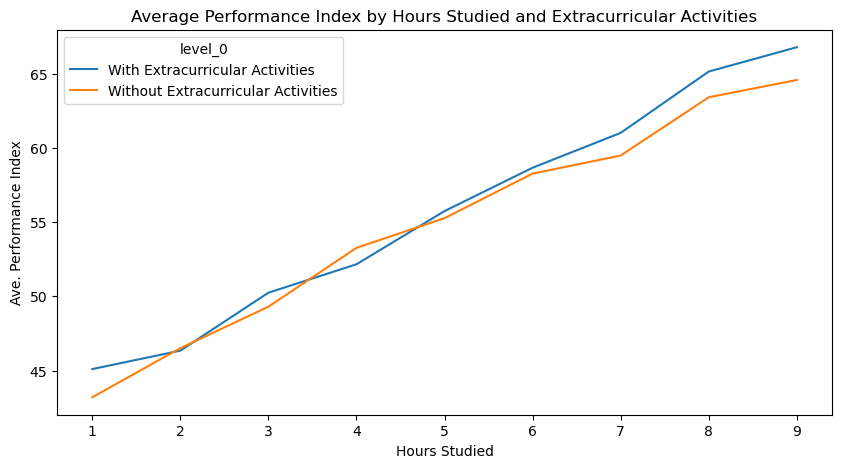

In [82]:
avg_performance_Y = df_Y.groupby('Hours Studied')['Performance Index'].mean()
avg_performance_N = df_N.groupby('Hours Studied')['Performance Index'].mean()
y = pd.concat([avg_performance_Y, avg_performance_N], axis=0,
              keys=['With Extracurricular Activities', 'Without Extracurricular Activities']).reset_index()

plt.figure(figsize = (10,5))
sns.lineplot(data = y, x = 'Hours Studied', y = 'Performance Index', hue = 'level_0')
plt.xlabel('Hours Studied')
plt.ylabel('Ave. Performance Index')
plt.title('Average Performance Index by Hours Studied and Extracurricular Activities')
plt.show()

In [ ]:
#Make a displot to all the columns based on extracurricular activities..

In [85]:
df1 = pd.concat([df_Y,df_N])
df1

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
...,...,...,...,...,...,...
9988,1,47,No,8,5,20.0
9989,3,46,No,5,8,27.0
9990,9,43,No,7,4,40.0
9992,9,52,No,9,7,50.0


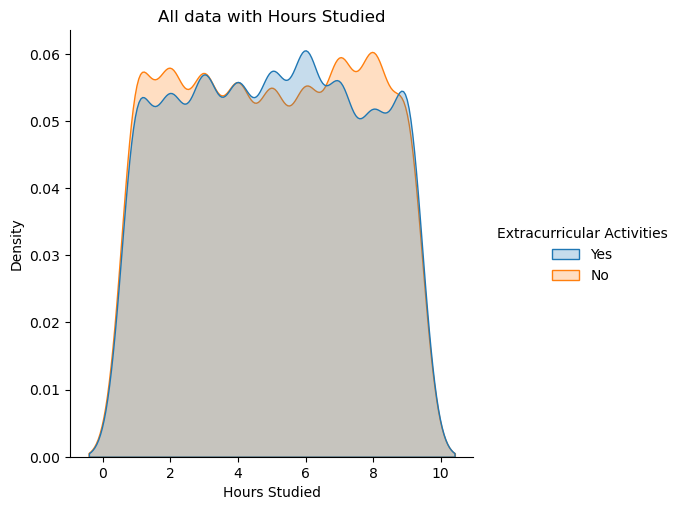

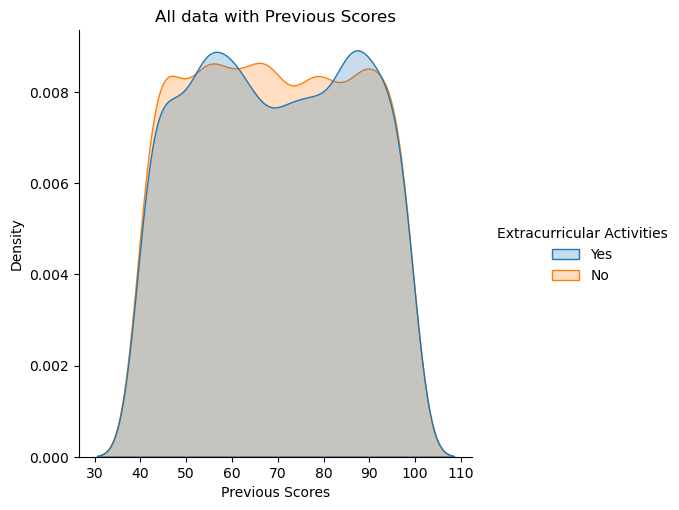

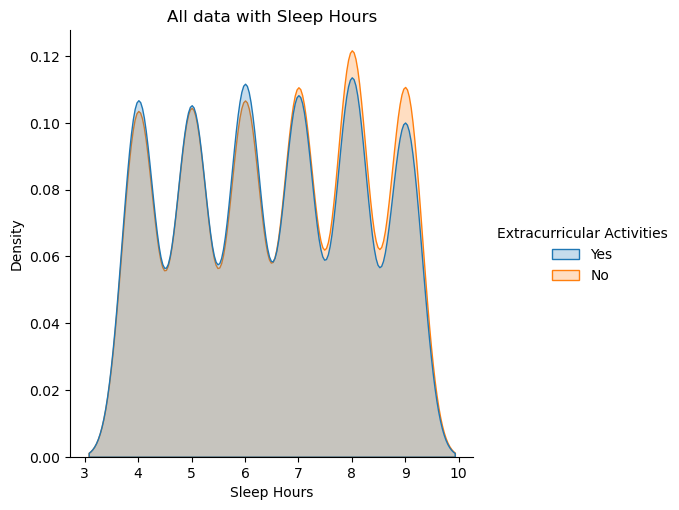

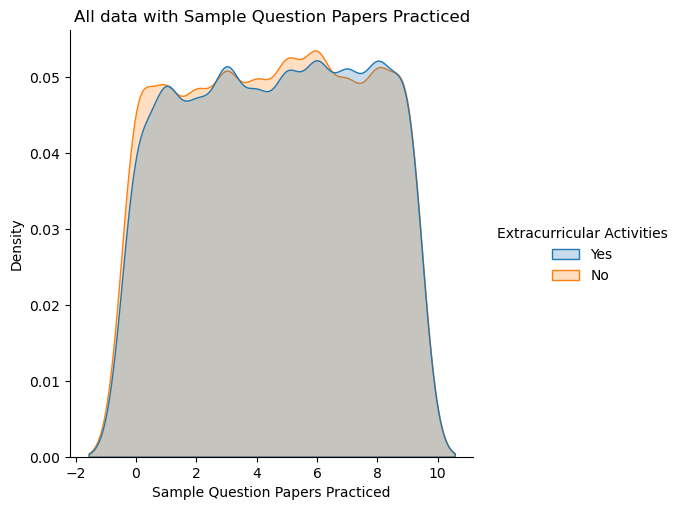

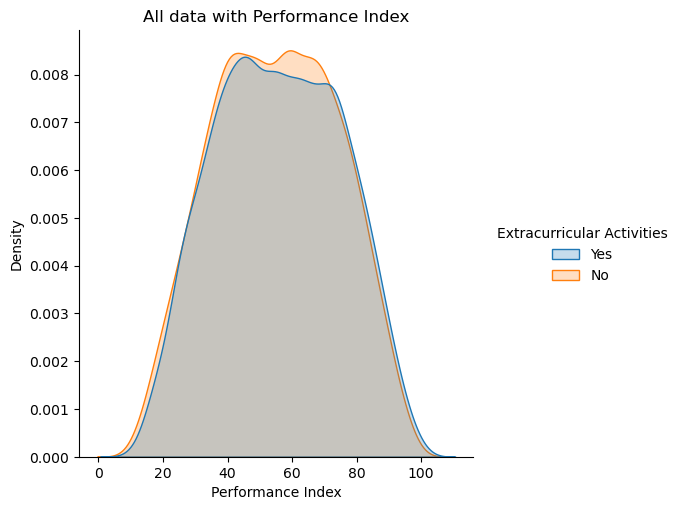

In [90]:
for i in df1.columns:
    if i != 'Extracurricular Activities':
        sns.displot(data= df1, x = i ,hue= 'Extracurricular Activities', kind='kde', fill=True)
        plt.title('All data with ' + i)
        plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_15112\2966060024.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


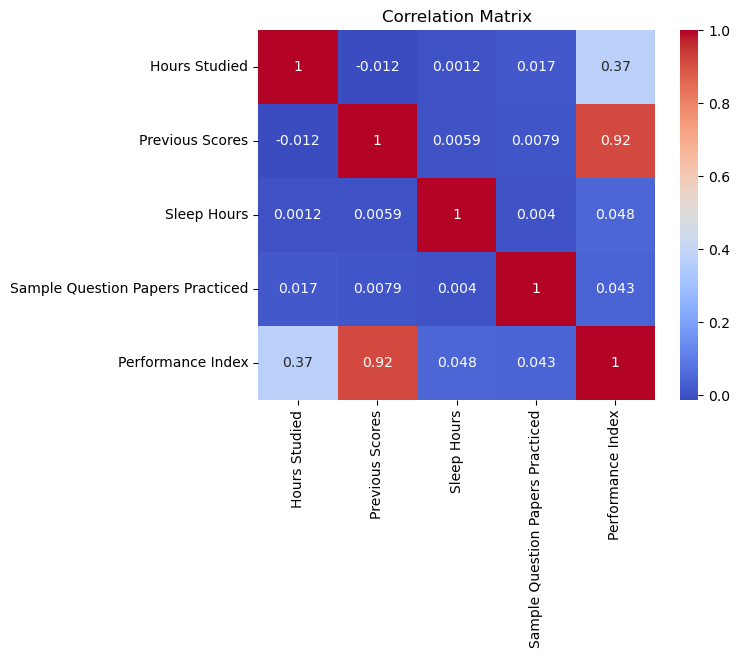

In [97]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

### Visualizing for Target correlation with Features

C:\Users\PC\AppData\Local\Temp\ipykernel_15112\3780806197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df1.corr()


<Axes: >

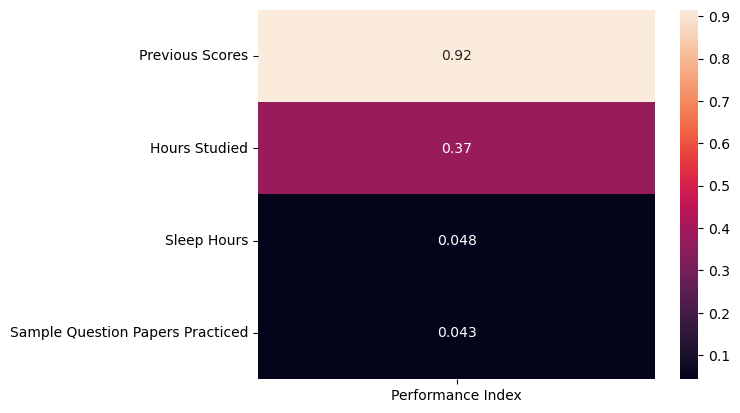

In [96]:
#Make a heatmap to visualze for target correlation with features..
corr= df1.corr()
sns.heatmap(corr['Performance Index'].drop('Performance Index').sort_values(ascending=False).to_frame(),annot=True)

### Visualizing feature data for Top 10% ranked students

In [74]:
#Visualize the top 10% ranked student with catplot between all the columns with the performance index based on 
# extracurricular activities...
df['Performance Index'].unique()

array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

In [75]:
q = df['Performance Index'].quantile(0.90)
q

81.0

In [77]:
Top_performance = df[df['Performance Index']>q]
Top_performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
10,8,91,No,4,5,84.0
21,6,96,No,9,0,85.0
27,9,84,Yes,6,6,83.0
55,6,99,No,4,7,91.0
...,...,...,...,...,...,...
9976,8,93,Yes,9,8,91.0
9977,9,84,No,6,6,82.0
9985,8,99,No,5,5,92.0
9991,5,97,Yes,7,4,83.0


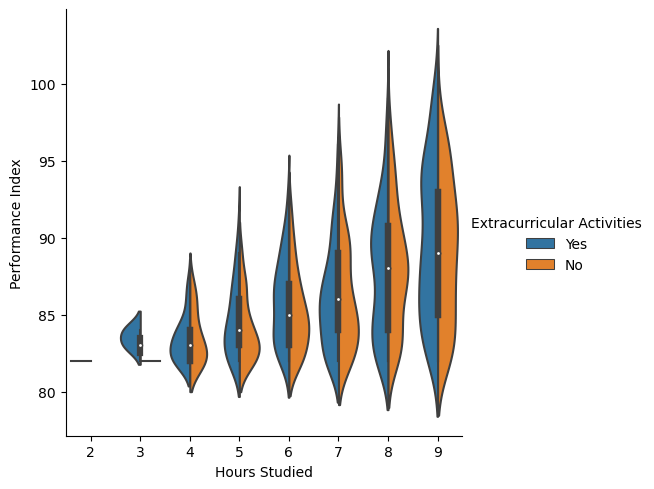

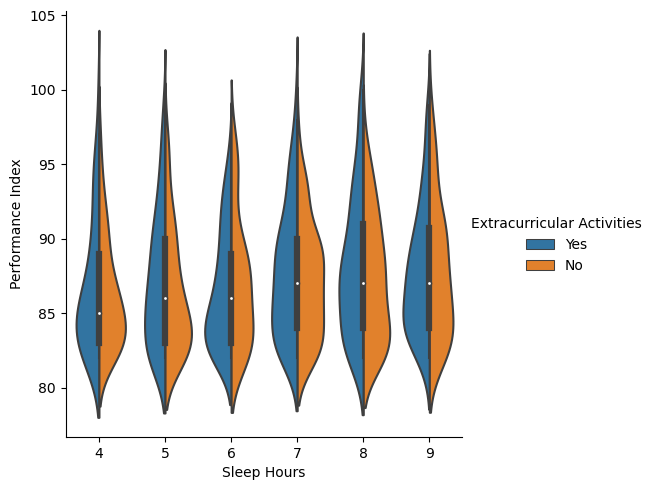

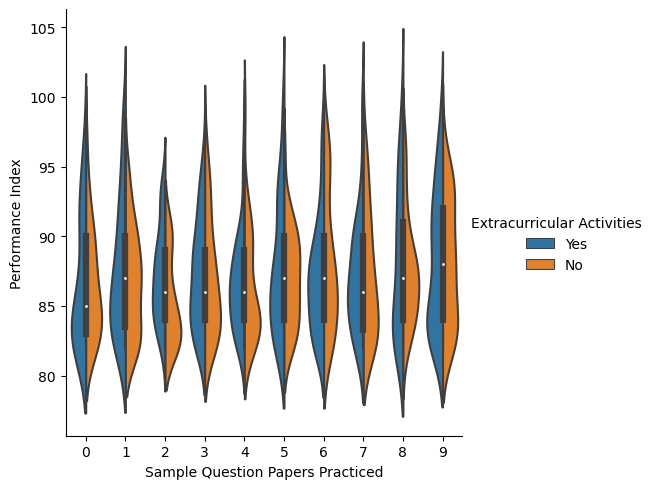

In [102]:
for i in ['Hours Studied', 'Sleep Hours','Sample Question Papers Practiced']:
    sns.catplot(data=Top_performance,x=i,y="Performance Index",hue='Extracurricular Activities',kind="violin", split=True)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

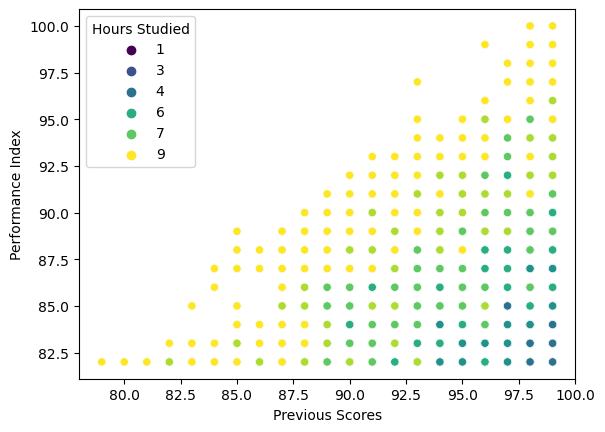

In [107]:
# Make a scatterplot between previous scores and the performance index..
sns.scatterplot(data=Top_performance, x = 'Previous Scores', y = 'Performance Index', hue = df['Hours Studied'], palette = 'viridis' )

# Training

In [125]:
x=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

In [128]:
# Encodig
encoder = LabelEncoder()
x["Extracurricular Activities"] = encoder.fit_transform(x["Extracurricular Activities"])

In [129]:
x
# Done

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [131]:
x_train.shape,x_test.shape

((8000, 5), (2000, 5))

In [132]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [133]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [141]:
y_pred = model.predict(x_test)
y_pred=np.round(y_pred,decimals=2)
Dataframe=pd.DataFrame({"Actual Performance":y_test,"Predicted Performance":y_pred})
Dataframe

,Actual Performance,Predicted Performance
4602,61.0,66.69
8948,18.0,21.48
8340,68.0,71.95
2640,50.0,50.80
7720,71.0,72.87
...,...,...
8343,68.0,71.98
8330,31.0,29.95
3568,48.0,47.49
2061,46.0,50.80


In [143]:
mean_squared_error(y_test,y_pred)

4.11342015

In [145]:
r2_score(y_test,y_pred)

0.9886988707997322

In [147]:
model.coef_

array([2.85025632, 1.01765861, 0.65017834, 0.47575528, 0.19748483])

In [148]:
model.intercept_

-34.01482976806681

In [149]:
model.score(x_train,y_train)

0.9887628013880039

In [150]:
model.score(x_test,y_test)

0.9886990579121693

In [154]:
Dataframe=Dataframe.sort_index()
Dataframe

,Actual Performance,Predicted Performance
2,45.0,45.06
10,84.0,84.28
11,73.0,72.43
15,43.0,47.45
19,63.0,59.89
...,...,...
9954,92.0,86.99
9956,62.0,63.93
9968,73.0,72.84
9970,55.0,55.59


<Axes: >

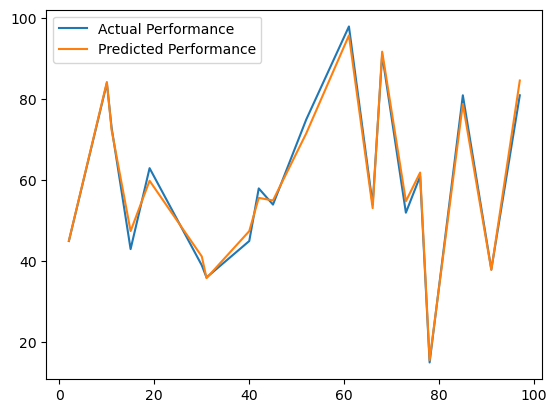

In [155]:
Dataframe.head(20).plot()

<Axes: >

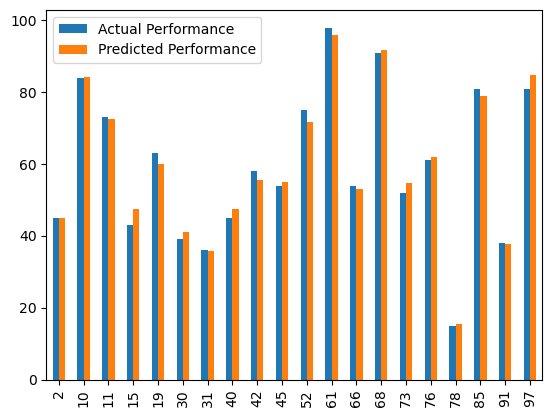

In [156]:
Dataframe.head(20).plot(kind="bar")

In [161]:
print("Made by hagar & Omar")

Made by hagar & Omar
